<a href="https://colab.research.google.com/github/andresmachado13/Data_Science_II_Entrega_1/blob/main/1era_Entrega_DS_AndresMachado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Abstracto: Motivación y Audiencia**

En este análisis exploramos la evolución de tres indicadores macroeconómicos clave en Argentina: La Inflación Anual, El Producto Interno Bruto (PIB) Per Cápita (ajustado por inflación), y El Tipo de Cambio Oficial (ARS/USD). Estos indicadores permiten entender la dinámica económica del país en los últimos 20 años y ofrecen una base para evaluar la estabilidad macroeconómica.


##**Audiencia Objetivo**

Este análisis está dirigido a Estudiantes, Analistas Económicos Jr, Formuladores de Políticas Públicas, y público interesado en economía argentina.


##**Análisis Metadata**

**Fuente de los datos:**
Banco Mundial (World Bank Open Data) + estimaciones manuales de inflación basadas según INDEC.

**Cobertura temporal:**
Años 2000 a 2023 (24 años).

**Cobertura geográfica:**
Argentina (código ISO: ARG).

**Cantidad de registros:**
24 filas (una por año).

**Formato del dataset:**
Tabular, con 4 columnas:

| Columna                     | Tipo de dato | Descripción                                                                                                     |
| --------------------------- | ------------ | --------------------------------------------------------------------------------------------------------------- |
| `Año`                       | Entero       | Año calendario entre 2000 y 2023.                                                                               |
| `Inflación (%)`             | Float        | Variación porcentual anual del índice de precios al consumidor (IPC). En algunos casos, completado manualmente. |
| `PIB per cápita (USD 2015)` | Float        | Producto Interno Bruto per cápita, ajustado por inflación, expresado en dólares constantes de 2015.             |
| `Tipo de cambio (LCU/USD)`  | Float        | Tipo de cambio oficial: unidades de moneda local (ARS) por 1 USD.                                               |


##**Preguntas / Hipótesis**

Con este análisis buscamos responder las siguientes interrogantes:

1. ¿Cómo ha evolucionado la inflación en Argentina desde el año 2000?
2. ¿Existe una relación visible entre la inflación y el tipo de cambio oficial?
3. ¿Cómo ha impactado la inflación en el crecimiento real del PIB per cápita?
4. ¿Podemos identificar períodos de mayor estabilidad o crisis en base a estos indicadores?












##**Análisis Exploratorio de Datos (EDA)**

In [5]:
# Importar Librerías
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Estilo de gráficos
plt.style.use("seaborn-v0_8-muted")
plt.rcParams["figure.figsize"] = (12, 6)

In [7]:
# Definir país y período
country = "ARG"  # Argentina
years = list(range(2000, 2024))

In [10]:
# Definir indicadores a consultar
indicators = {
    "Inflación (%)": "FP.CPI.TOTL.ZG",
    "PIB per cápita (USD 2015)": "NY.GDP.PCAP.KD",
    "Tipo de cambio (LCU/USD)": "PA.NUS.FCRF"
}

In [13]:
# Descargar los datos crudos
raw_df = wb.data.DataFrame(
    indicators.values(),
    economy=country,
    time=years,
    labels=True
).reset_index()

In [15]:
# Ver columnas disponibles
print(raw_df.columns)

Index(['series', 'Series', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021', 'YR2022', 'YR2023'],
      dtype='object')


In [17]:
print(raw_df.columns.to_list())


['series', 'Series', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020', 'YR2021', 'YR2022', 'YR2023']


In [18]:
raw_df.head()


,series,Series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),10631.650364,10051.944846,8861.561993,9545.531941,10302.446532,11099.750919,11870.279156,12811.902121,...,13456.131916,13679.626498,13265.886064,13520.112985,13058.328545,12706.397811,11393.050596,12549.281170,13182.793395,12933.249734
2,PA.NUS.FCRF,"Official exchange rate (LCU per US$, period av...",0.999500,0.999500,3.063257,2.900629,2.923301,2.903658,3.054313,3.095649,...,8.075276,9.233186,14.758175,16.562707,28.094992,48.147892,70.539167,94.990742,130.616550,296.258042


###Transponer y preparar el *DataFrame*

In [20]:
# Transponer y limpiar
df_t = raw_df.set_index('series').drop(columns='Series').T


In [22]:
# Convertir el índice (años) en una columna
df_t.index = df_t.index.str.extract(r'(\d{4})')[0].astype(int)
df_t.index.name = "Año"

In [23]:
# Renombrar columnas
df_t = df_t.rename(columns={
    'FP.CPI.TOTL.ZG': 'Inflación (%)',
    'NY.GDP.PCAP.KD': 'PIB per cápita (USD 2015)',
    'PA.NUS.FCRF': 'Tipo de cambio (LCU/USD)'
})

In [24]:
# Resetear índice
df = df_t.reset_index()


In [25]:
# Convertir columnas a numérico
df[['Inflación (%)', 'PIB per cápita (USD 2015)', 'Tipo de cambio (LCU/USD)']] = df[[
    'Inflación (%)', 'PIB per cápita (USD 2015)', 'Tipo de cambio (LCU/USD)'
]].apply(pd.to_numeric)

In [26]:
# Verificar resultado
df.head()

series,Año,Inflación (%),PIB per cápita (USD 2015),Tipo de cambio (LCU/USD)
0,2000,NaN,10631.650364,0.999500
1,2001,NaN,10051.944846,0.999500
2,2002,NaN,8861.561993,3.063257
3,2003,NaN,9545.531941,2.900629
4,2004,NaN,10302.446532,2.923301


###Datos Faltantes

In [31]:
print(raw_df[['series', 'Series']])


           series                                             Series
0  FP.CPI.TOTL.ZG              Inflation, consumer prices (annual %)
1  NY.GDP.PCAP.KD                 GDP per capita (constant 2015 US$)
2     PA.NUS.FCRF  Official exchange rate (LCU per US$, period av...


In [32]:
inflacion = wb.data.DataFrame(
    'FP.CPI.TOTL.ZG',
    economy='ARG',
    time=range(2000, 2024),
    labels=True
).reset_index()

inflacion.head()


,economy,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Cargar manualmente la inflación (2000–2023)

In [35]:
# Datos reales INDEC
inflacion_manual = {
    2000: -0.7,
    2001: -1.5,
    2002: 41.0,
    2003: 3.7,
    2004: 6.1,
    2005: 9.6,
    2006: 10.9,
    2007: 8.5,
    2008: 20.9,
    2009: 13.4,
    2010: 22.6,
    2011: 19.8,
    2012: 16.4,
    2013: 14.7,
    2014: 31.6,
    2015: 27.2,
    2016: 40.9,
    2017: 24.8,
    2018: 47.6,
    2019: 53.8,
    2020: 42.0,
    2021: 48.4,
    2022: 72.4,
    2023: 211.4
}


In [38]:
df["Inflación (%)"] = df["Año"].map(inflacion_manual)

In [39]:
# Verificar resultado
df.head()

series,Año,Inflación (%),PIB per cápita (USD 2015),Tipo de cambio (LCU/USD)
0,2000,-0.7,10631.650364,0.999500
1,2001,-1.5,10051.944846,0.999500
2,2002,41.0,8861.561993,3.063257
3,2003,3.7,9545.531941,2.900629
4,2004,6.1,10302.446532,2.923301


##**Evolución de la Inflación Anual**

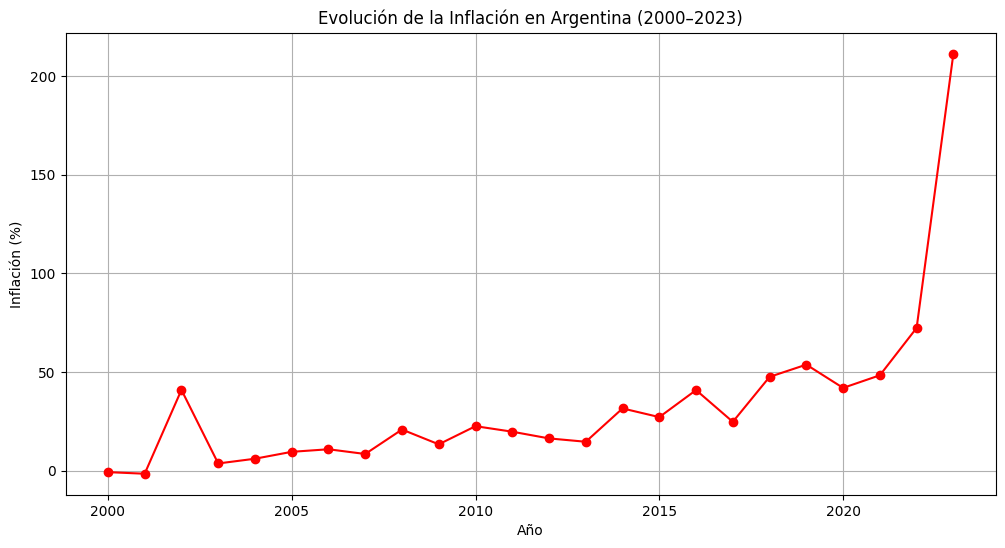

In [40]:
plt.plot(df["Año"], df["Inflación (%)"], color="red", marker="o")
plt.title("Evolución de la Inflación en Argentina (2000–2023)")
plt.xlabel("Año")
plt.ylabel("Inflación (%)")
plt.grid(True)
plt.show()


####**Insight:** La inflación fue relativamente contenida hasta 2006, pero a partir de 2014 comenzó una tendencia acelerada que culmina con un 211% en 2023.

##**PIB per cápita en dólares constantes de 2015**

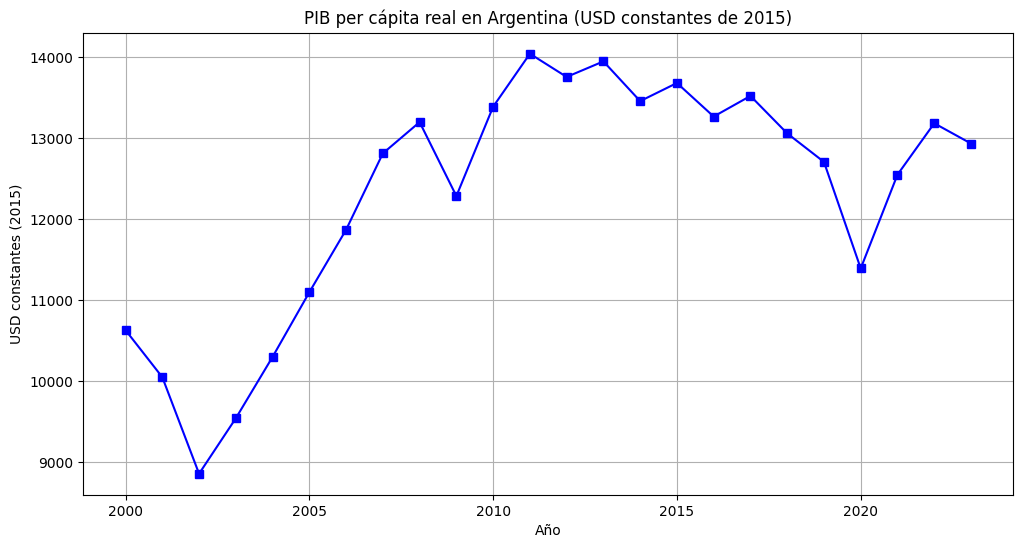

In [41]:
plt.plot(df["Año"], df["PIB per cápita (USD 2015)"], color="blue", marker="s")
plt.title("PIB per cápita real en Argentina (USD constantes de 2015)")
plt.xlabel("Año")
plt.ylabel("USD constantes (2015)")
plt.grid(True)
plt.show()


####**Insight:** Se observa un pico entre 2007–2011 y luego una caída progresiva, indicando estancamiento económico en términos reales.

##**Tipo de cambio oficial (ARS/USD)**

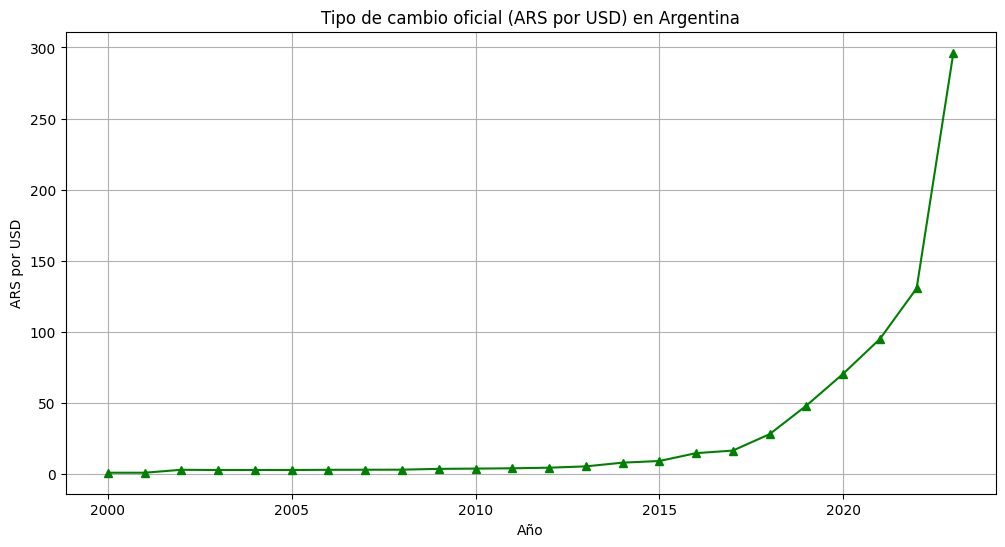

In [42]:
plt.plot(df["Año"], df["Tipo de cambio (LCU/USD)"], color="green", marker="^")
plt.title("Tipo de cambio oficial (ARS por USD) en Argentina")
plt.xlabel("Año")
plt.ylabel("ARS por USD")
plt.grid(True)
plt.show()


####**Insight:** El tipo de cambio se mantuvo relativamente estable hasta 2012, y luego se aceleró, reflejando procesos de devaluación importantes.

##**Inflación vs Tipo de cambio**

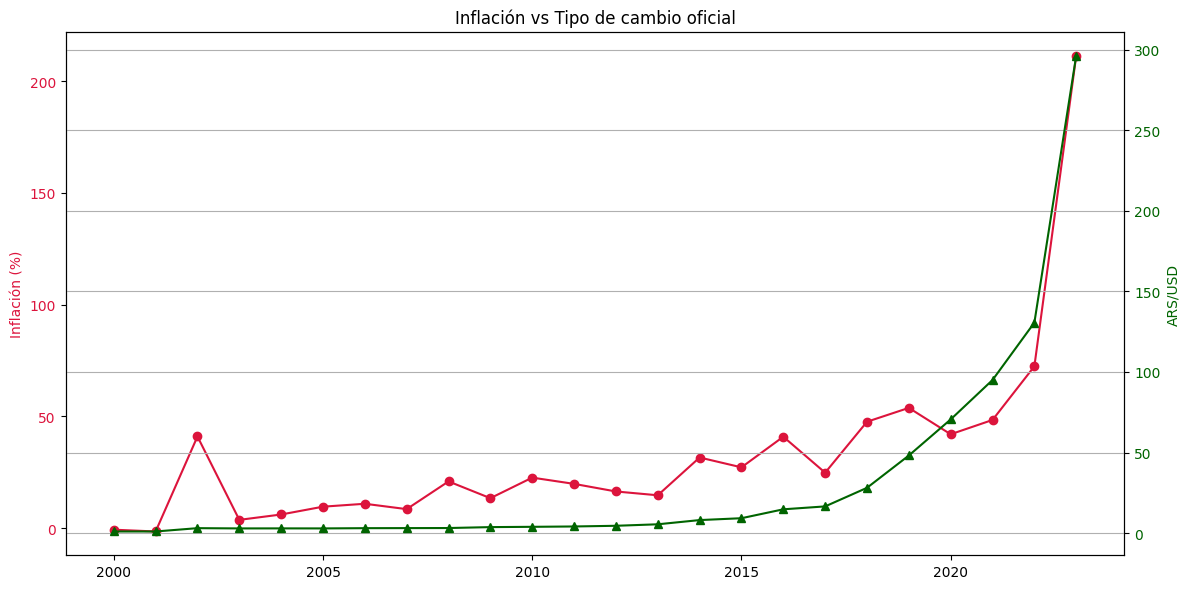

In [44]:
fig, ax1 = plt.subplots()

ax1.plot(df["Año"], df["Inflación (%)"], color="crimson", label="Inflación", marker="o")
ax1.set_ylabel("Inflación (%)", color="crimson")
ax1.tick_params(axis="y", labelcolor="crimson")

ax2 = ax1.twinx()
ax2.plot(df["Año"], df["Tipo de cambio (LCU/USD)"], color="darkgreen", label="Tipo de cambio", marker="^")
ax2.set_ylabel("ARS/USD", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

plt.title("Inflación vs Tipo de cambio oficial")
plt.grid(True)
fig.tight_layout()
plt.show()



####**Insight:** Existe una relación directa entre inflación y tipo de cambio: cada salto en el dólar coincide con un aumento inflacionario posterior.

##**PIB Per Cápita vs Inflación**

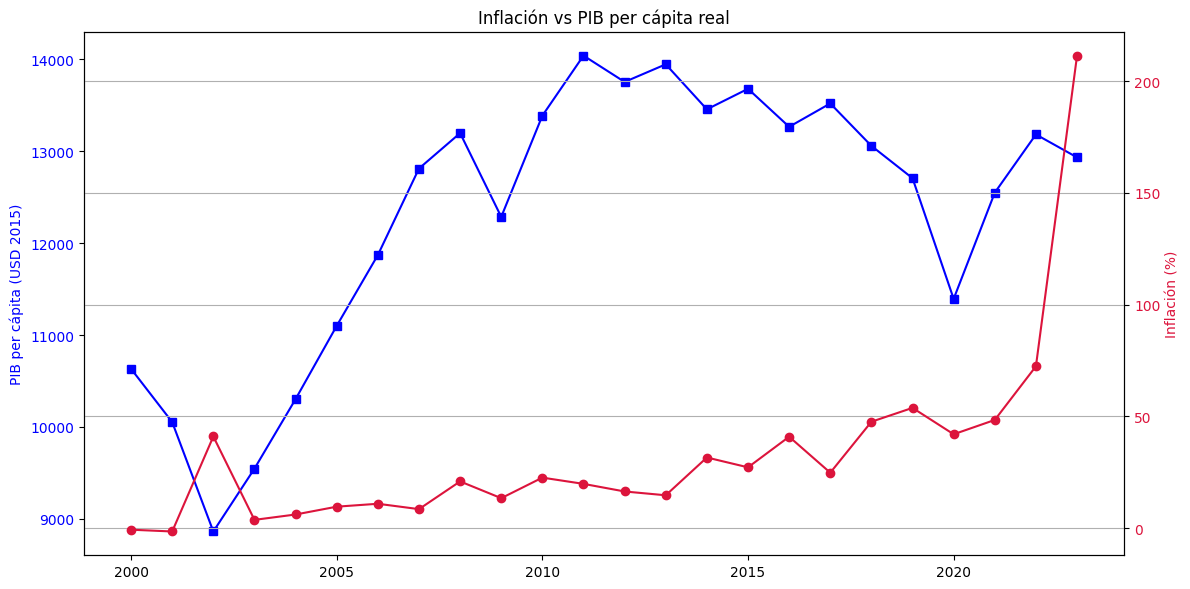

In [45]:
fig, ax1 = plt.subplots()

ax1.plot(df["Año"], df["PIB per cápita (USD 2015)"], color="blue", marker="s")
ax1.set_ylabel("PIB per cápita (USD 2015)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["Año"], df["Inflación (%)"], color="crimson", marker="o")
ax2.set_ylabel("Inflación (%)", color="crimson")
ax2.tick_params(axis="y", labelcolor="crimson")

plt.title("Inflación vs PIB per cápita real")
plt.grid(True)
fig.tight_layout()
plt.show()


####**Insight:** En general, los picos de inflación coinciden con estancamientos o caídas en el poder adquisitivo medido por PIB per cápita real.